In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# Load Data

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [3]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking", "sex"]
y = 'DEATH_EVENT'
numerical_features = [feature for feature in data.columns if feature not in categorical_features and feature != y]
print("Categorical Features are:", categorical_features)
print("Numerical Features are:", numerical_features)

Categorical Features are: ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']
Numerical Features are: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [6]:
# Convert Categorical Features to dtype of category
for feature in categorical_features:
    data[feature] = data[feature].astype('category')

In [7]:
data.dtypes

age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                    int64
dtype: object

In [8]:
# Look at summary of data for numerical features
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


In [9]:
# Look at summary of data for categorical features
data.describe(include='category')

,anaemia,diabetes,high_blood_pressure,sex,smoking
count,299,299,299,299,299
unique,2,2,2,2,2
top,0,0,0,1,0
freq,170,174,194,194,203


## Check for Missing Values
There are no missing values in the data

In [10]:
pd.isnull(data).any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

# Data Visualisation

## Categorical Features

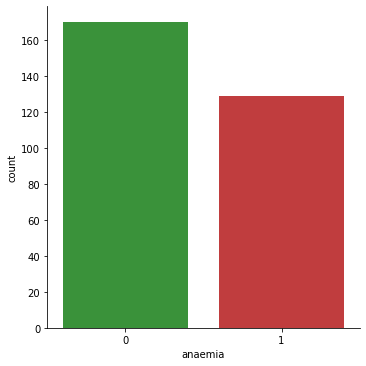

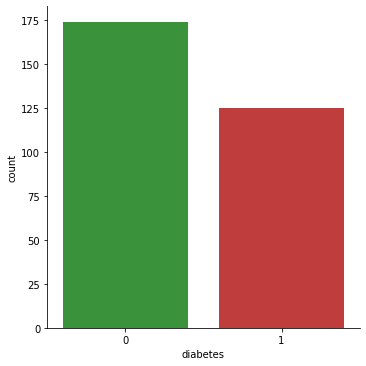

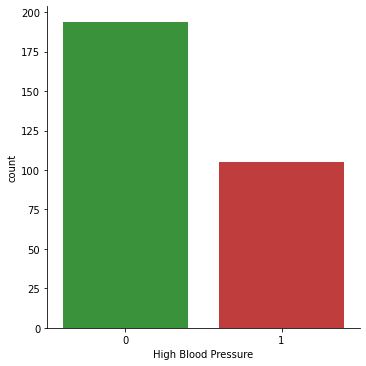

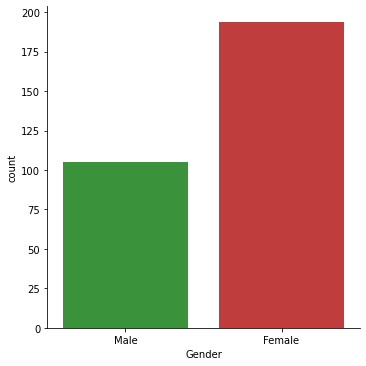

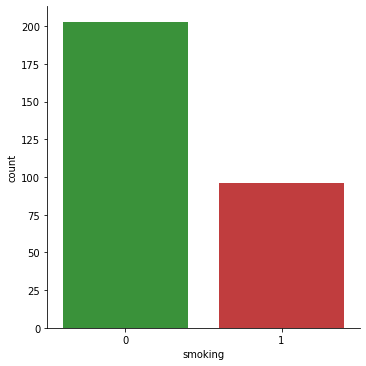

In [11]:
color_palette = ["tab:green", "tab:red"]
sns.catplot(x="anaemia", kind="count", data=data, palette=color_palette)
sns.catplot(x="diabetes", kind="count", data=data, palette=color_palette)
sns.catplot(x="high_blood_pressure", kind="count", data=data, palette=color_palette)
plt.xlabel("High Blood Pressure")
sns.catplot(x="sex", kind="count", data=data, palette=color_palette)
plt.xticks([0,1], ['Male','Female'])
plt.xlabel("Gender")
sns.catplot(x="smoking", kind="count", data=data, palette=color_palette)

## Numerical Features

In [12]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [13]:
def get_age_bin(age):
    if 40 <= age < 50:
        return "40-49"
    elif 50 <= age < 59:
        return "50-59"
    elif 60 <= age < 69:
        return "60-69"
    elif 70 <= age < 79:
        return "50-59"
    elif 80 <= age < 89:
        return "80-89"
    else:
        return ">= 90"


In [14]:
data_copy = data.copy()
data_copy["age_bins"] = [get_age_bin(age) for age in data.age]

In [15]:
age_plot = data_copy.groupby('age_bins').agg(death_rate = pd.NamedAgg(column="DEATH_EVENT", aggfunc=np.mean)).reset_index()
age_plot

,age_bins,death_rate
0,40-49,0.234043
1,50-59,0.286822
2,60-69,0.277778
3,80-89,0.684211
4,>= 90,0.714286


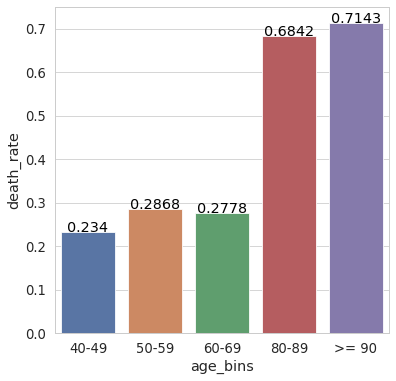

In [16]:
plt.rcParams['figure.figsize']=(6,6)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5) 
age_barplot = sns.barplot(x="age_bins", y="death_rate",data=age_plot)
for index, row in age_plot.iterrows():
    age_barplot.text(row.name, row.death_rate, round(row.death_rate,4), color="black", ha="center")

# Model Training

## Check for data balance

<AxesSubplot:ylabel='Count'>

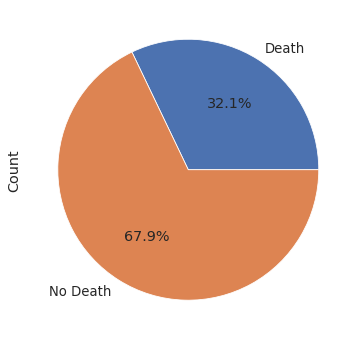

In [17]:
data_copy.insert(0, "Count", len(data.index)*[1])
data_copy.replace({0:"No Death", 1:"Death"}).groupby("DEATH_EVENT")['Count'].count().plot.pie(autopct="%.1f%%")

32.1% of the data have outcome of death, so data might not be very balanced

## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = data.DEATH_EVENT
x = data.drop("DEATH_EVENT", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 340)

## Helper functions for Model Training

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [21]:
sns.set(style='white')

In [22]:
def create_pipeline(model):
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numeric_transformer = StandardScaler()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)])
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    return clf

def confusion_matrix_scorer(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

def evaluate_results(y_test, y_pred):
    cm = confusion_matrix_scorer(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"Number of True Positives: {cm['tp']}\nNumber of False Positives: {cm['fp']}\nNumber of True Negatives: {cm['tn']}\
    \nNumber of False Negatives: {cm['fn']}")
    print("Accuracy Score: %0.4f" % acc)
    print("Balanced Accuracy Score: %0.4f" % bal_acc)
    print("Recall Score: %0.4f" % rec)
    return{"bal_acc":bal_acc, "acc":acc, "recall":rec}

def evaluate(model):
    print("Model Evaluation on Train Set")
    y_t_pred = model.predict(x_train)
    evaluate_results(y_train, y_t_pred)
    plot_confusion_matrix(model, x_train, y_train, normalize="true")
    plt.title("Confusion Matrix for Train Set")
    print("-----------------------------------")
    print("Model Evaluation on Test Set")
    y_pred = model.predict(x_test)
    scores = evaluate_results(y_test, y_pred)
    plot_confusion_matrix(model, x_test, y_test, normalize="true")
    plt.title("Confusion Matrix for Test Set")
    return scores

def SearchParams(model, params, score = "recall", verbose=3):
    '''Takes in model, params (dict of parameters for grid serach), score - the scoring method
    and returns the gridsearchobject'''
    pipe = create_pipeline(model)
    search = GridSearchCV(pipe, params, n_jobs=-1, scoring=score, verbose=verbose)
    search.fit(x_train,y_train)
    print("The best mean %s score is %.4f" % (score, search.best_score_))
    print("The best parameters are:", search.best_params_)
    scores = evaluate(search.best_estimator_)
    return (search, scores)

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model_NB = create_pipeline(GaussianNB())
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)

Model Evaluation on Train Set
Number of True Positives: 38
Number of False Positives: 13
Number of True Negatives: 127    
Number of False Negatives: 31
Accuracy Score: 0.7895
Balanced Accuracy Score: 0.7289
Recall Score: 0.5507
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 12
Number of False Positives: 4
Number of True Negatives: 59    
Number of False Negatives: 15
Accuracy Score: 0.7889
Balanced Accuracy Score: 0.6905
Recall Score: 0.4444


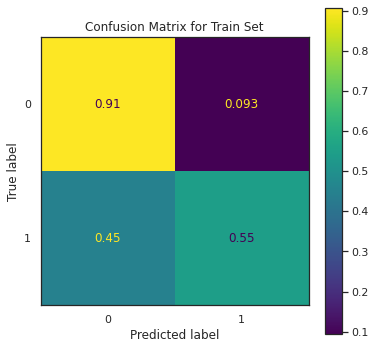

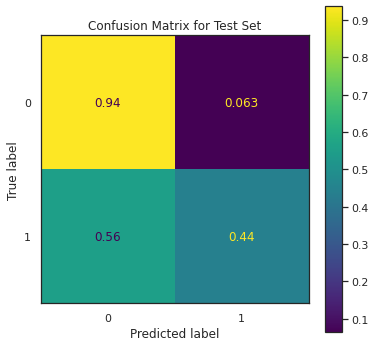

In [25]:
scores_NB = evaluate(model_NB)

## Support Vector Machines

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

Fitting 5 folds for each of 140 candidates, totalling 700 fits
The best mean recall score is 0.6374
The best parameters are: {'classifier__C': 1.3, 'classifier__kernel': 'sigmoid', 'classifier__tol': 0.01}
Model Evaluation on Train Set
Number of True Positives: 41
Number of False Positives: 22
Number of True Negatives: 118    
Number of False Negatives: 28
Accuracy Score: 0.7608
Balanced Accuracy Score: 0.7185
Recall Score: 0.5942
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 20
Number of False Positives: 7
Number of True Negatives: 56    
Number of False Negatives: 7
Accuracy Score: 0.8444
Balanced Accuracy Score: 0.8148
Recall Score: 0.7407


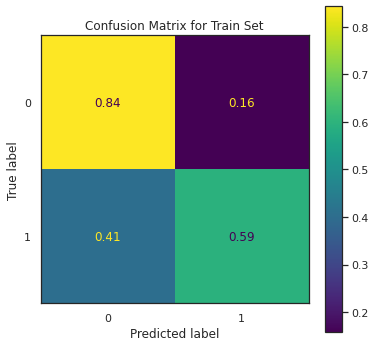

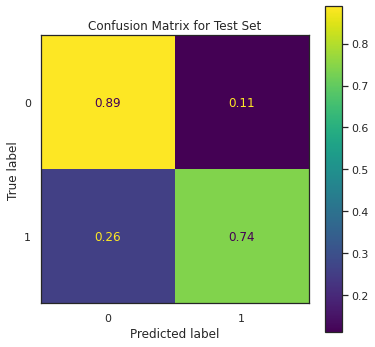

In [27]:
parameters = {'classifier__kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'classifier__C':(2,1.5,1.3,1.2,1.1,1, 0.1), 'classifier__tol':(0.1, 0.01, 0.001, 0.0001, 0.00001)}
model_svm, scores_svm = SearchParams(SVC(random_state=41), parameters)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
The best mean recall score is 0.7670
The best parameters are: {'classifier__alpha': 0.0001, 'classifier__tol': 0.01}
Model Evaluation on Train Set
Number of True Positives: 57
Number of False Positives: 37
Number of True Negatives: 103    
Number of False Negatives: 12
Accuracy Score: 0.7656
Balanced Accuracy Score: 0.7809
Recall Score: 0.8261
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 23
Number of False Positives: 10
Number of True Negatives: 53    
Number of False Negatives: 4
Accuracy Score: 0.8444
Balanced Accuracy Score: 0.8466
Recall Score: 0.8519


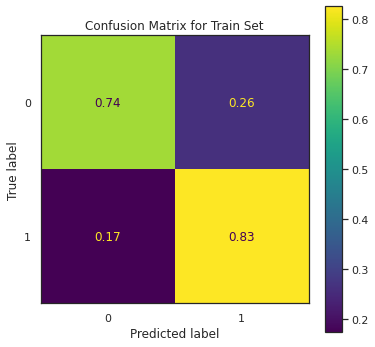

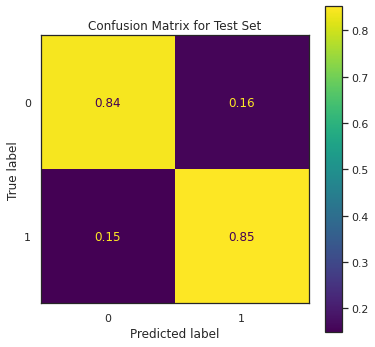

In [28]:
parameters = {'classifier__alpha':(0.0001, 0.001, 0.01), 'classifier__tol':(0.1,0.01,0.001, 0.0001, 0.00001)}
model_svm, scores_svm = SearchParams(SGDClassifier(random_state=41), parameters)

Stochastic Gradient Descent Method performs better than SVC in optimising SVM

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean recall score is 0.6505
The best parameters are: {'classifier__C': 1, 'classifier__tol': 0.1}
Model Evaluation on Train Set
Number of True Positives: 47
Number of False Positives: 15
Number of True Negatives: 125    
Number of False Negatives: 22
Accuracy Score: 0.8230
Balanced Accuracy Score: 0.7870
Recall Score: 0.6812
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 17
Number of False Positives: 4
Number of True Negatives: 59    
Number of False Negatives: 10
Accuracy Score: 0.8444
Balanced Accuracy Score: 0.7831
Recall Score: 0.6296


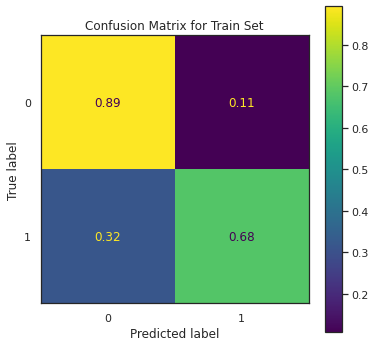

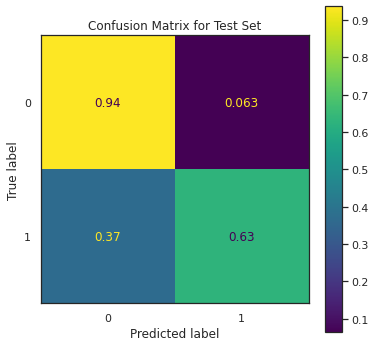

In [30]:
parameters = {'classifier__C':(0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5), 'classifier__tol':(0.1,0.01,0.001, 0.0001, 0.00001)}
model_LR, scores_LR = SearchParams(LogisticRegression(random_state=41), parameters)

## K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best mean recall score is 0.3912
The best parameters are: {'classifier__n_neighbors': 7}
Model Evaluation on Train Set
Number of True Positives: 32
Number of False Positives: 3
Number of True Negatives: 137    
Number of False Negatives: 37
Accuracy Score: 0.8086
Balanced Accuracy Score: 0.7212
Recall Score: 0.4638
-----------------------------------
Model Evaluation on Test Set
Number of True Positives: 9
Number of False Positives: 4
Number of True Negatives: 59    
Number of False Negatives: 18
Accuracy Score: 0.7556
Balanced Accuracy Score: 0.6349
Recall Score: 0.3333


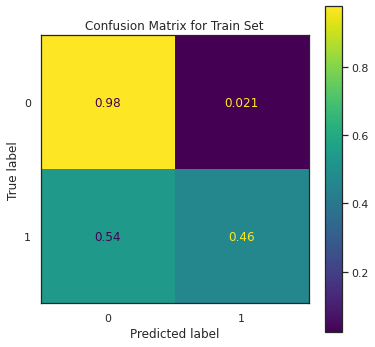

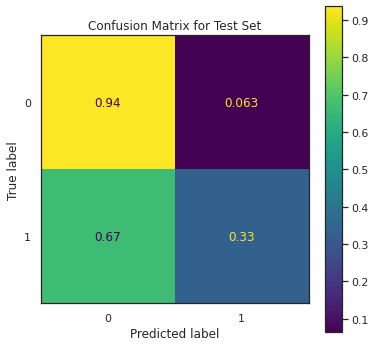

In [32]:
model_knn, scores_knn = SearchParams(KNeighborsClassifier(), {'classifier__n_neighbors':tuple(range(3,22,2))})

In [33]:
models = ['knn', 'NB', 'svm', 'LR']
final_models = []
for model in models:
    print(model +':', globals()['scores_'+model])
    if model != "NB":
        final_models.append(globals()['model_'+model])

knn: {'bal_acc': 0.6349206349206349, 'acc': 0.7555555555555555, 'recall': 0.3333333333333333}
NB: {'bal_acc': 0.6904761904761905, 'acc': 0.7888888888888889, 'recall': 0.4444444444444444}
svm: {'bal_acc': 0.8465608465608465, 'acc': 0.8444444444444444, 'recall': 0.8518518518518519}
LR: {'bal_acc': 0.783068783068783, 'acc': 0.8444444444444444, 'recall': 0.6296296296296297}


SVM appears to perform the best.

## Neural Network

In [34]:
import tensorflow as tf
from keras import Sequential
from keras import layers
from keras.optimizers import SGD
from tensorflow.keras import regularizers

In [35]:
data_nn = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [36]:
y = data_nn.DEATH_EVENT
x = data_nn.drop("DEATH_EVENT", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 340)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train[numerical_features])
x_train_copy = x_train.copy()
transformed = scaler.transform(x_train[numerical_features])
x_train_copy[numerical_features] = transformed
x_train = x_train_copy
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
159,-0.145840,1,-0.448171,0,0.644881,1,1.074678,-0.287871,0.554832,1,1,-0.068027
183,1.230517,0,-0.477861,0,0.031846,1,-0.370823,1.140017,-0.539130,1,0,0.473218
169,0.800406,0,0.250532,0,-0.230883,1,0.477623,-0.593847,-0.757922,0,0,0.248799
161,-1.350153,1,-0.447181,0,-0.230883,0,-0.894556,-0.593847,0.554832,1,1,-0.068027
83,1.574607,1,-0.521406,0,1.082763,1,-0.915505,0.426073,-0.757922,1,0,-0.635673


In [38]:
x_test_copy = x_test.copy()
transformed = scaler.transform(x_test[numerical_features])
x_test_copy[numerical_features] = transformed
x_test = x_test_copy
x_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
54,-0.059818,1,-0.318525,1,0.031846,0,-0.046109,0.834041,-0.976714,0,1,-1.071309
95,-0.231863,1,-0.444212,0,1.958526,1,-0.423196,-0.389863,0.992417,1,0,-0.569668
254,-0.661975,1,-0.134448,0,1.958526,1,0.041438,-0.389863,0.554832,1,0,1.172876
201,-1.350153,0,-0.271021,1,1.958526,1,1.231798,-0.389863,-0.101545,1,0,0.790044
293,0.198249,1,-0.473902,1,-0.230883,0,-0.842182,-0.491855,-0.101545,1,1,1.898936


In [39]:
def create_model():
    model = Sequential(
        [layers.Dense(4, kernel_regularizer=regularizers.l2(0.01),
                 activation='relu', input_shape=(12,)),
        layers.Dropout(0.2),
        layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(512, kernel_regularizer=regularizers.l2(0.01),
                     activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')]
    )

    metric = tf.keras.metrics.Recall()
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=0.001, momentum=0.9),
                  metrics=[metric,'accuracy'])

    history = model.fit(x_train, y_train,epochs=100, batch_size=1, verbose=1, validation_split=0.3)
    return (model, history)
model, history = create_model()

Epoch 1/100
146/146 [==============================] - 2s 9ms/step - loss: 7.3381 - recall: 0.0000e+00 - accuracy: 0.6117 - val_loss: 7.0463 - val_recall: 0.0000e+00 - val_accuracy: 0.6032
Epoch 2/100
146/146 [==============================] - 1s 4ms/step - loss: 6.9018 - recall: 0.0000e+00 - accuracy: 0.7118 - val_loss: 6.6771 - val_recall: 0.0000e+00 - val_accuracy: 0.6032
Epoch 3/100
146/146 [==============================] - 1s 4ms/step - loss: 6.5477 - recall: 0.0000e+00 - accuracy: 0.6626 - val_loss: 6.3382 - val_recall: 0.0000e+00 - val_accuracy: 0.6032
Epoch 4/100
146/146 [==============================] - 1s 4ms/step - loss: 6.1423 - recall: 0.0000e+00 - accuracy: 0.7627 - val_loss: 6.0086 - val_recall: 0.0000e+00 - val_accuracy: 0.6032
Epoch 5/100
146/146 [==============================] - 1s 4ms/step - loss: 5.8935 - recall: 0.0000e+00 - accuracy: 0.6701 - val_loss: 5.7047 - val_recall: 0.0000e+00 - val_accuracy: 0.6032
Epoch 6/100
146/146 [==============================] - 

In [40]:
history.history.keys()

dict_keys(['loss', 'recall', 'accuracy', 'val_loss', 'val_recall', 'val_accuracy'])

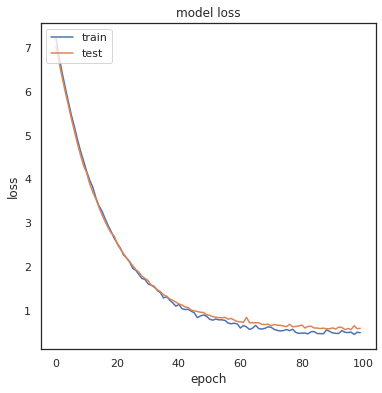

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

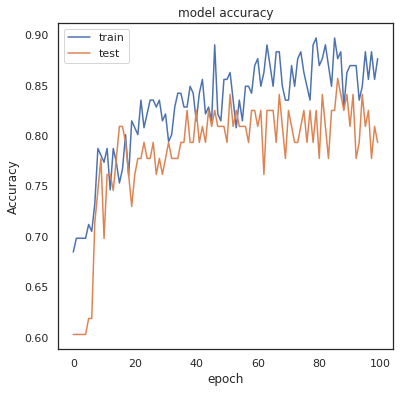

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
y_pred = model.predict(x_test)

score = model.evaluate(x_test, y_test,verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 0.5400 - recall: 0.7037 - accuracy: 0.8111


In [44]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
159,-0.145840,1,-0.448171,0,0.644881,1,1.074678,-0.287871,0.554832,1,1,-0.068027
183,1.230517,0,-0.477861,0,0.031846,1,-0.370823,1.140017,-0.539130,1,0,0.473218
169,0.800406,0,0.250532,0,-0.230883,1,0.477623,-0.593847,-0.757922,0,0,0.248799
161,-1.350153,1,-0.447181,0,-0.230883,0,-0.894556,-0.593847,0.554832,1,1,-0.068027
83,1.574607,1,-0.521406,0,1.082763,1,-0.915505,0.426073,-0.757922,1,0,-0.635673
...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.920042,1,-0.456088,1,0.206999,0,0.006264,-0.695839,-1.414299,1,0,0.644832
33,-0.920042,1,-0.418481,1,-0.668765,0,0.446199,-0.185879,0.336040,0,0,-1.282527
247,0.284271,0,-0.434316,0,-1.106647,0,-0.140381,1.038025,-0.320337,1,0,1.159675
34,0.370294,0,-0.482809,1,1.082763,1,-0.747911,-0.389863,0.773625,1,0,-1.282527
